# Task 1


### Action I

In [9]:
import yfinance as yf

ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")
print(df.head())

                                 Open        High         Low       Close  \
Date                                                                        
2020-09-10 00:00:00-04:00  117.076303  117.212483  109.430742  110.393730   
2020-09-11 00:00:00-04:00  111.444250  112.086247  106.998931  108.944366   
2020-09-14 00:00:00-04:00  111.590192  112.767179  109.722575  112.212730   
2020-09-15 00:00:00-04:00  115.101709  115.588068  110.510479  112.387825   
2020-09-16 00:00:00-04:00  112.086270  112.835259  108.983298  109.070839   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-09-10 00:00:00-04:00  182274400        0.0           0.0  
2020-09-11 00:00:00-04:00  180860300        0.0           0.0  
2020-09-14 00:00:00-04:00  140150100        0.0           0.0  
2020-09-15 00:00:00-04:00  184642000        0.0           0.0  
2020-09-16 00:00:00-04:00  154679000        0.0           0.0  


#### Column Explanations

Date (index) – Trading day.\
Open – Price when the stock first traded that day.\
High – Highest price during that day.\
Low – Lowest price during that day.\
Close – Price at the end of the trading day (this is our target y).\
Volume – Number of shares traded that day.\
Dividends – Dividend issued per share on that day (if any).\
Stock Splits – Stock split ratio (if a split occurred that day).

#### Choosing Features (X) to Predict Close 
Since the goal is to predict Close, we need predictors that make sense: \
Good candidates for Features (X): \
Open → starting price of the day (strongly related to Close). \
High → daily max, often correlated with closing price. \
Low → daily min, also correlated. \
Volume → market activity, might influence price movement. \
Not ideal for prediction in this assignment: \
Dividends (rare events, mostly 0). \
Stock Splits (rare events, mostly 0). 

In [10]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

### Action II

In [11]:
import yfinance as yf
import pandas as pd

# Get stock data
ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")

# Define Features (X) and Target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Write features to console
print("Features (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())


Features (X) sample:
                                 Open        High         Low     Volume
Date                                                                    
2020-09-10 00:00:00-04:00  117.076303  117.212483  109.430742  182274400
2020-09-11 00:00:00-04:00  111.444250  112.086247  106.998931  180860300
2020-09-14 00:00:00-04:00  111.590192  112.767179  109.722575  140150100
2020-09-15 00:00:00-04:00  115.101709  115.588068  110.510479  184642000
2020-09-16 00:00:00-04:00  112.086270  112.835259  108.983298  154679000

Target (y) sample:
Date
2020-09-10 00:00:00-04:00    110.393730
2020-09-11 00:00:00-04:00    108.944366
2020-09-14 00:00:00-04:00    112.212730
2020-09-15 00:00:00-04:00    112.387825
2020-09-16 00:00:00-04:00    109.070839
Name: Close, dtype: float64


#### Action III

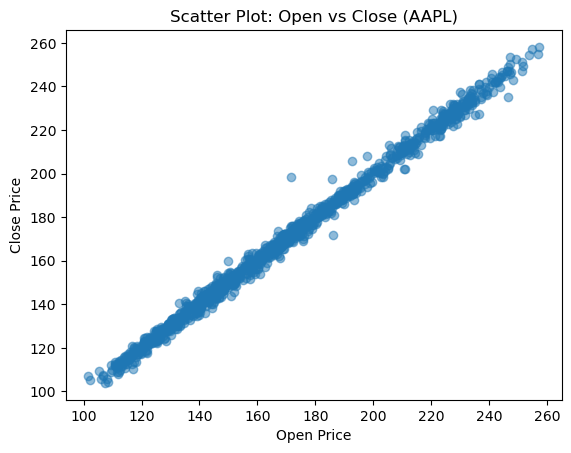

In [12]:
import matplotlib.pyplot as plt

# Plot open and close values
plt.scatter(df["Open"], df["Close"], alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Scatter Plot: Open vs Close (AAPL)")
plt.show()

#### Action IV

In [13]:
# Combine X and y into one DataFrame for correlation
corr = df[["Open", "High", "Low", "Volume", "Close"]].corr()

print("Correlation matrix:")
print(corr["Close"])

Correlation matrix:
Open      0.997554
High      0.998920
Low       0.998864
Volume   -0.528866
Close     1.000000
Name: Close, dtype: float64


Open → Close: Very strong positive correlation (~0.99). \
High → Close: Very strong positive correlation (~0.99). \
Low → Close: Very strong positive correlation (~0.99). \
Volume → Close: Negative correlation (-0.531181).

This suggests that higher trading activity sometimes coincides with price dropping.

#### Action V

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Split dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print to console
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (878, 4)
Testing features shape: (377, 4)
Training target shape: (878,)
Testing target shape: (377,)


#### Action VI

In [16]:
from sklearn.metrics import r2_score

# Chatgbt fix not sure how this works will come back
# TODO
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()


NameError: name 'y_pred' is not defined

#### Action VII

In [ ]:
# Print model intercept etc to console
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.7207442016323853
Coefficients: [-5.96976620e-01  8.00487369e-01  7.94171859e-01 -3.65800350e-09]


#### Action VIII

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# CHATGBT FIX - kept running into errors.. didnt know this was a thing you could do  
# Check if model trained
print("Model trained with features:", X_train.columns.tolist())

# Grab 3 rows of data from test set
sample_data = X_test.iloc[:3]

print("Real sample features:")
print(sample_data)

# Predict using trained model
real_predictions = model.predict(sample_data)

print("\nPredicted Close values for Yahoo Finance data:")
for i, pred in enumerate(real_predictions):
    print(f"Row {i+1} | Actual Close: {y_test.iloc[i]:.2f} | Predicted Close: {pred:.2f}")

# Fit r2 score 
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)


Model trained with features: ['Open', 'High', 'Low', 'Volume']
Real sample features:
                                 Open        High         Low    Volume
Date                                                                   
2025-06-16 00:00:00-04:00  197.076343  198.464767  196.337176  43020700
2021-02-04 00:00:00-05:00  132.810181  133.882007  131.143957  84183100
2020-11-20 00:00:00-05:00  115.602335  115.729004  114.286902  73604300

Predicted Close values for Yahoo Finance data:
Row 1 | Actual Close: 198.20 | Predicted Close: 197.67
Row 2 | Actual Close: 133.87 | Predicted Close: 132.33
Row 3 | Actual Close: 114.34 | Predicted Close: 114.61
OLS R2 score 0.9989245328885826
